In [1]:
#loading some stuff 
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import pickle

In [2]:
base_path = 'c:/Users/tpiechowiak/OneDrive - GN Store Nord/GNOS data/'
#now load the demographics data
with open(base_path + "Demographics_Device_Data.pkl", "rb") as input_file:
    demo_data = pickle.load(input_file)
print("Read Demographics and device data")

#load the average-use time data 
with open(base_path + "AvgUseTime.pkl", "rb") as input_file:
    avg_use_time = pickle.load(input_file)
print("Read average use-time data")


Read Demographics and device data
Read average use-time data


In [3]:
#merge with average use time for that group and clean up 
df_new = pd.merge(demo_data,avg_use_time, on='HearingInstrumentId', how='inner').\
    sort_values('PatientId').drop_duplicates(subset=['PatientId','HearingInstrumentId'])

df_new.drop(columns='Cluster_class',inplace = True)

In [4]:
df_new.keys()

Index(['PatientId', 'HearingInstrumentId', 'CountryCode', 'Earside',
       'StateCode', 'BrandName', 'Gender', 'YearOfBirth',
       'UserExperienceLevel', 'AudClass', 'asym', 'Age', 'AgeGroup',
       'Formfactor', 'AvgUseTime'],
      dtype='object')

In [5]:
X = df_new[['CountryCode','BrandName','Gender','UserExperienceLevel','AudClass',
                           'AgeGroup','Formfactor','asym']].pipe(pd.get_dummies, columns = ['CountryCode',
                                                                                      'BrandName',
                                                                                      'AudClass',
                                                                                      'Gender',
                                                                                      'Formfactor',
                                                                                      'AgeGroup'
                                                                                      ])
Y = df_new['AvgUseTime'].values

In [24]:
#set up regression tree - try with all predictors as one-hot coded 
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree

tr = DecisionTreeRegressor(random_state=0, max_depth=3, min_samples_leaf=50, min_samples_split=50)
tr.fit(X.values,Y)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=50, min_samples_split=50,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [25]:
X.columns

Index(['UserExperienceLevel', 'AudClass', 'asym', 'CountryCode_AR',
       'CountryCode_AT', 'CountryCode_AU', 'CountryCode_BE', 'CountryCode_BR',
       'CountryCode_CA', 'CountryCode_CH', 'CountryCode_CL', 'CountryCode_DE',
       'CountryCode_DK', 'CountryCode_ES', 'CountryCode_FI', 'CountryCode_FR',
       'CountryCode_GB', 'CountryCode_HK', 'CountryCode_HU', 'CountryCode_ID',
       'CountryCode_IE', 'CountryCode_IL', 'CountryCode_IN', 'CountryCode_IS',
       'CountryCode_IT', 'CountryCode_JP', 'CountryCode_KR', 'CountryCode_LB',
       'CountryCode_MX', 'CountryCode_MY', 'CountryCode_NL', 'CountryCode_NO',
       'CountryCode_NZ', 'CountryCode_PL', 'CountryCode_SE', 'CountryCode_SG',
       'CountryCode_SI', 'CountryCode_TR', 'CountryCode_US', 'CountryCode_ZA',
       'BrandName_Beltone', 'BrandName_ReSound', 'Gender_0', 'Gender_1',
       'Gender_2', 'Formfactor_BTE', 'Formfactor_ITC', 'Formfactor_ITE',
       'Formfactor_RIE', 'AgeGroup_Middle age', 'AgeGroup_Odd', 'AgeGroup_O

In [26]:
export_graphviz(tr,out_file='RegressionTree.dot', feature_names=X.columns, filled=False, rounded=True,
               proportion=True,
               leaves_parallel=True)

In [27]:
from subprocess import call
call(['dot', '-T', 'pdf', 'RegressionTree.dot', '-o', 'RegressionTree.pdf'])

0

### Regression with AudClass ordered numbers 

In [10]:
#now try regressing again but this time without audiogram one-hot encoding 
X = df_new[['CountryCode','BrandName','Gender','UserExperienceLevel','AudClass',
                           'AgeGroup','Formfactor','asym']].pipe(pd.get_dummies, columns = ['CountryCode',
                                                                                      'BrandName',                                                                                      
                                                                                      'Gender',
                                                                                      'Formfactor',
                                                                                      'AgeGroup'
                                                                                      ])
Y = df_new['AvgUseTime'].values 

In [11]:
X.head(10)

,UserExperienceLevel,AudClass,asym,CountryCode_AR,CountryCode_AT,CountryCode_AU,CountryCode_BE,CountryCode_BR,CountryCode_CA,CountryCode_CH,...,Formfactor_BTE,Formfactor_ITC,Formfactor_ITE,Formfactor_RIE,AgeGroup_Middle age,AgeGroup_Odd,AgeGroup_Old,AgeGroup_Very Young,AgeGroup_Very old,AgeGroup_Young
0,3,S2,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
82,3,N3,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
104,0,N5,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
112,0,N5,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
162,0,N2,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
125,0,S3,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
206,0,N2,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
208,0,N2,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
210,3,N5,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
278,0,S1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [12]:
#now encode the audiogram classes (based on ordering standard audiograms)
X['AudClass'] = X['AudClass'].map({'N1':0, 'N2':1, 'N3':2, 'N4':3, 'N5':4, 'N6':5,
                                   'N7':6, 'S1':1, 'S2':2, 'S3':3})

In [13]:
X.head(5)

,UserExperienceLevel,AudClass,asym,CountryCode_AR,CountryCode_AT,CountryCode_AU,CountryCode_BE,CountryCode_BR,CountryCode_CA,CountryCode_CH,...,Formfactor_BTE,Formfactor_ITC,Formfactor_ITE,Formfactor_RIE,AgeGroup_Middle age,AgeGroup_Odd,AgeGroup_Old,AgeGroup_Very Young,AgeGroup_Very old,AgeGroup_Young
0,3,2,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
82,3,2,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
104,0,4,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
112,0,4,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
162,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [43]:
#now prepare the Decision Classifier 
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree

tr = DecisionTreeRegressor(random_state=0, max_depth=3, min_samples_leaf=100, min_samples_split=100)
tr.fit(X.values,Y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=100, min_samples_split=100,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [44]:
export_graphviz(tr,out_file='RegressionTree_v2.dot', feature_names=X.columns,filled=False, rounded=True,
               proportion=True,
               leaves_parallel=True)

In [45]:
from subprocess import call
call(['dot', '-T', 'pdf', 'RegressionTree_v2.dot', '-o', 'RegressionTree_v2.pdf'])

0

[Text(0, 0, '0'),
 Text(0, 0, '10'),
 Text(0, 0, '20'),
 Text(0, 0, '30'),
 Text(0, 0, '40'),
 Text(0, 0, '50'),
 Text(0, 0, '60')]

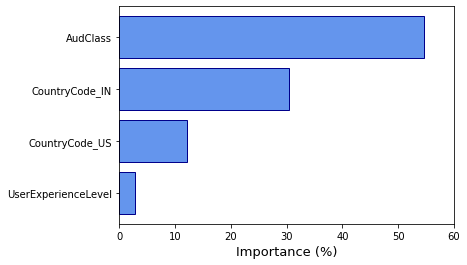

In [46]:
#now plot importance of predictors 
#now plot the sorted importance of the features 
x_ax = X.columns[np.where(tr.feature_importances_ > 0)]
y_ax = tr.feature_importances_[np.where(tr.feature_importances_ > 0)]

fig, ax = plt.subplots()

unsorted_list = [(importance, feature) for feature, importance in 
                  zip(x_ax, y_ax)]
sorted_list = sorted(unsorted_list)
features_sorted = []
importance_sorted = []

for i in sorted_list:
    features_sorted += [i[1]]
    importance_sorted += [i[0]]

#plt.title("Feature importance", fontsize=15)
plt.xlabel("Importance (%)", fontsize=13)

plt.barh(features_sorted,importance_sorted, color="cornflowerblue", edgecolor='darkblue')
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
ax.set_xticklabels([0, 10, 20, 30, 40, 50, 60])

In [18]:
S1 = [15, 10, 10, 15, 15, 30, 55, 70]
S2 = [20, 15, 20, 35, 55, 80, 95, 95]
S3 = [25, 35, 60, 75, 75, 75, 80, 85]

N1 = [10, 10, 10, 10, 10, 20, 35, 40]
N2 = [20, 20, 25, 30, 35, 40, 50, 50]
N3 = [35, 35, 40, 45, 50, 55, 60, 70]
N4 = [55, 55, 55, 60, 65, 65, 75, 80]
N5 = [65, 70, 75, 80, 80, 75, 80, 80]
N6 = [75, 80, 85, 90, 90, 95, 100, 100]
N7 = [90, 95, 105, 105, 105, 105, 105, 105]


In [19]:
(np.mean([S1, S2, S3],axis = 1),
np.mean([N1, N2, N3, N4, N5, N6, N7], axis = 1))

(array([27.5  , 51.875, 63.75 ]),
 array([ 18.125,  33.75 ,  48.75 ,  63.75 ,  75.625,  89.375, 101.875]))

In [20]:
X.head(5)

,UserExperienceLevel,AudClass,asym,CountryCode_AR,CountryCode_AT,CountryCode_AU,CountryCode_BE,CountryCode_BR,CountryCode_CA,CountryCode_CH,...,Formfactor_BTE,Formfactor_ITC,Formfactor_ITE,Formfactor_RIE,AgeGroup_Middle age,AgeGroup_Odd,AgeGroup_Old,AgeGroup_Very Young,AgeGroup_Very old,AgeGroup_Young
0,3,2,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
82,3,2,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
104,0,4,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
112,0,4,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
162,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
